<a href="https://colab.research.google.com/github/Jean-Rd/Algoritms_Intro_machineLearningWithPython/blob/master/caesarian%20grph%20pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
seed =1234

In [3]:
np.random.seed(seed=seed)
random.seed(seed)

In [4]:
caesarian = pd.read_csv(r'https://raw.githubusercontent.com/Jean-Rd/Datasets/master/Caesarian%20Section%20Classification%20Dataset(CSV).csv')

In [5]:
caesarian.head()

,Age,Delivey No,Delivery No,Blood of Pressure,Heart Problem,Caesarian
0,22,1,Timely,High,apt,No
1,26,2,Timely,Normal,apt,Yes
2,26,2,Premature,Normal,apt,No
3,28,1,Timely,High,apt,No
4,22,2,Timely,Normal,apt,Yes


In [6]:
caesarian.drop('Delivey No', axis=1, inplace=True)

In [7]:
caesarian.head()

,Age,Delivery No,Blood of Pressure,Heart Problem,Caesarian
0,22,Timely,High,apt,No
1,26,Timely,Normal,apt,Yes
2,26,Premature,Normal,apt,No
3,28,Timely,High,apt,No
4,22,Timely,Normal,apt,Yes


In [8]:
caesarian.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                80 non-null     int64 
 1   Delivery No        80 non-null     object
 2   Blood of Pressure  80 non-null     object
 3   Heart Problem      80 non-null     object
 4   Caesarian          80 non-null     object
dtypes: int64(1), object(4)
memory usage: 3.2+ KB


In [9]:
X = caesarian.iloc[:,0:4]
y = caesarian.iloc[:, 4:]

In [10]:
y.replace('yes', 'Yes', inplace=True)

y.value_counts()

Caesarian
Yes          46
No           34
dtype: int64

In [11]:
X['Blood of Pressure'].value_counts()
X['Blood of Pressure'].replace('low', 'Low', inplace=True)
X['Blood of Pressure'].value_counts()

Normal    40
High      20
Low       20
Name: Blood of Pressure, dtype: int64

In [12]:
X['Heart Problem'].value_counts()

apt      50
inept    30
Name: Heart Problem, dtype: int64

In [13]:
X['Heart Problem'].replace('apt', 1, inplace=True)
X['Heart Problem'].replace('inept', 0, inplace=True)

X['Heart Problem'].value_counts()

1    50
0    30
Name: Heart Problem, dtype: int64

In [14]:
X['Blood of Pressure'].replace('Low', 0, inplace=True)
X['Blood of Pressure'].replace('Normal', 1, inplace=True)
X['Blood of Pressure'].replace('High', 2, inplace=True)

X['Blood of Pressure'].value_counts()

1    40
2    20
0    20
Name: Blood of Pressure, dtype: int64

In [15]:
X['Delivery No'].value_counts()

Timely       46
Premature    17
Latecomer    17
Name: Delivery No, dtype: int64

In [16]:
X['Delivery No'].replace('Premature', 0, inplace=True)
X['Delivery No'].replace('Latecomer', 1, inplace=True)
X['Delivery No'].replace('Timely', 2, inplace=True)

X['Delivery No'].value_counts()

2    46
1    17
0    17
Name: Delivery No, dtype: int64

In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Age                80 non-null     int64
 1   Delivery No        80 non-null     int64
 2   Blood of Pressure  80 non-null     int64
 3   Heart Problem      80 non-null     int64
dtypes: int64(4)
memory usage: 2.6 KB


In [18]:
for i in X.columns:

  X[i] = X[i].astype(np.uint8)

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Age                80 non-null     uint8
 1   Delivery No        80 non-null     uint8
 2   Blood of Pressure  80 non-null     uint8
 3   Heart Problem      80 non-null     uint8
dtypes: uint8(4)
memory usage: 448.0 bytes


In [19]:
y.value_counts()

y.replace('Yes', 1, inplace=True)
y.replace('No', 0, inplace=True)

y.value_counts()

y = y.astype(np.uint8)

y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Caesarian  80 non-null     uint8
dtypes: uint8(1)
memory usage: 208.0 bytes


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_, y_train, y_ = train_test_split(X, y, train_size=0.6, stratify=y, random_state=0)
X_test, X_val, y_test, y_val = train_test_split(X_, y_, test_size=0.5, stratify=y_, random_state=0)

In [21]:
X_train.shape, X_test.shape, X_test.shape

((48, 4), (16, 4), (16, 4))

In [22]:
import warnings

warnings.filterwarnings('ignore')

In [23]:
X_train.head()

,Age,Delivery No,Blood of Pressure,Heart Problem
50,33,1,1,0
34,26,1,1,1
16,25,2,1,1
9,27,0,1,1
17,20,1,2,1


In [24]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, svd_solver='full', random_state=65)

pca.fit(X)

X_pca = pca.transform(X)

In [25]:
dta_pca = pd.DataFrame(np.hstack([X_pca, y.values]))

dta_pca.head()

dta_pca.columns = ['comp0', 'comp1', 'target']

dta_pca.head()

,comp0,comp1,target
0,-5.683837,-0.776300,0.0
1,-1.696048,-0.611321,1.0
2,-1.696189,1.361591,0.0
3,0.314009,-0.757029,0.0
4,-5.694612,-0.624168,1.0


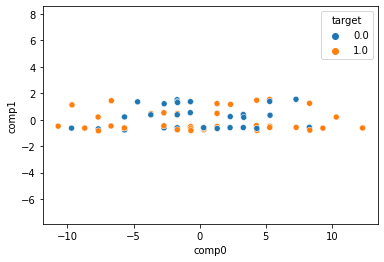

In [26]:
import seaborn as sns

sns.scatterplot(x='comp0', y='comp1', hue='target', data=dta_pca)
plt.axis('equal')
plt.show()

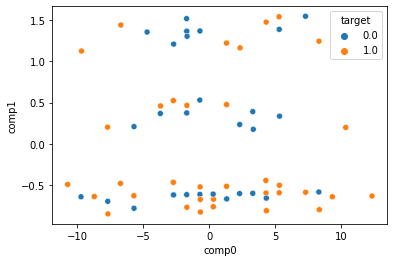

In [27]:
sns.scatterplot(x='comp0', y='comp1', hue='target', data=dta_pca)
plt.show()

In [52]:
zeros = dta_pca[dta_pca.target == 0]
ones = dta_pca[dta_pca.target == 1]

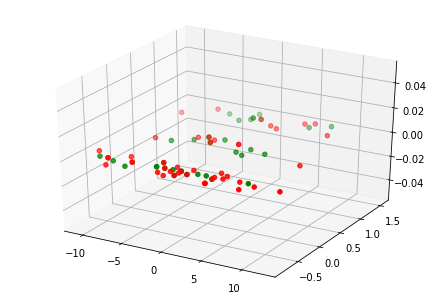

In [59]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()

ax = Axes3D(fig)

color = ['red', 'blue']

ax.scatter3D(zeros.iloc[:,0], zeros.iloc[:,1], c='green')
ax.scatter3D(ones.iloc[:,0], ones.iloc[:,1], c='red')
plt.show()